In [14]:
from robingrad import Tensor, draw_dot
import robingrad.nn as nn
import torch
from sklearn.datasets import make_regression
import numpy as np
import time
from sklearn.metrics import r2_score

### Dataset

In [2]:
X, y = make_regression(n_samples=200, n_features=5, n_targets=1, random_state=42)
print(X.shape)
print(y.shape)
print(X[0])
print(y[0:5])

(200, 5)
(200,)
[0.95927083 0.02451017 0.49799829 1.45114361 2.15318246]
[172.54436082 -52.9529574   -4.14935233 193.99958991 -66.96262773]


In [3]:
X_train = Tensor(X, requires_grad=True)
print(type(X_train), X_train.shape)
y_train = Tensor(y, requires_grad=True)
print(type(y_train), y_train.shape)

<class 'robingrad.tensor.Tensor'> (200, 5)
<class 'robingrad.tensor.Tensor'> (200,)


### Debug

In [9]:
a = Tensor(X_train[0].data.tolist(), requires_grad=True).reshape((1,5))
print(a)
print(a.shape)

Tensor: reshape
data: 
[[0.95927083 0.02451017 0.4979983  1.4511436  2.1531825 ]]
grad: 
[[0. 0. 0. 0. 0.]]
dtype: float32

(1, 5)


In [10]:
layer = nn.Linear(5, 1, bias=True)
print(layer.weight.shape)
print(layer.weight)
print(layer.bias.shape)
print(layer.bias)

(1, 5)
Tensor: normal
data: 
[[-0.86192435 -0.39124867 -0.44199428  0.29467714  0.29709584]]
grad: 
[[0. 0. 0. 0. 0.]]
dtype: float32

(1,)
Tensor: normal
data: 
[1.64548]
grad: 
[0.]
dtype: float32



In [11]:
b = layer(a)
print(b)

Tensor: __add__
data: 
[[1.6562796]]
grad: 
[[0.]]
dtype: float32



In [14]:
try:
    b.backward()
except Exception as e:
    print(e)

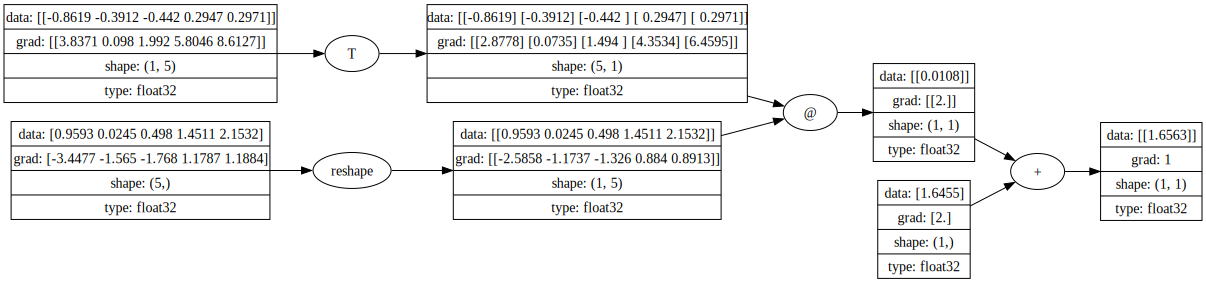

In [15]:
draw_dot(b, inspect=True)

In [4]:
a = Tensor.full((1,5), 1., requires_grad=True)
print(a)
print(a.shape)
b = Tensor.full((5,1), 2., requires_grad=True)
print(b)
print(b.shape)

Tensor: full
data: 
[[1. 1. 1. 1. 1.]]
grad: 
[[0. 0. 0. 0. 0.]]
dtype: float32

(1, 5)
Tensor: full
data: 
[[2.]
 [2.]
 [2.]
 [2.]
 [2.]]
grad: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
dtype: float32

(5, 1)


In [5]:
c = a @ b
print(c)
print(c.shape)

Tensor: __matmul__
data: 
[[10.]]
grad: 
[[0.]]
dtype: float32

(1, 1)


In [6]:
try:
    c.backward()
except Exception as e:
    print(e)

matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)


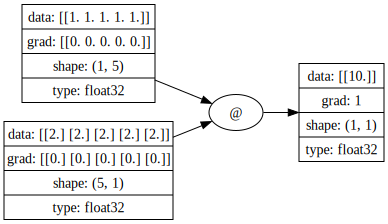

In [7]:
draw_dot(c, inspect=True)

### Model

In [4]:
class TinyNet:
    def __init__(self):
        self.l1 = nn.Linear(5,16)
        self.l2 = nn.Linear(16,1)
    def __call__(self, x):
        x = self.l1(x)
        x = x.relu()
        x = self.l2(x)
        return x
        
net = TinyNet()

In [5]:
res = net(X_train[0].reshape((1,5)))
res

Tensor: __add__
data: 
[[14.895546]]
grad: 
[[0.]]
dtype: float32

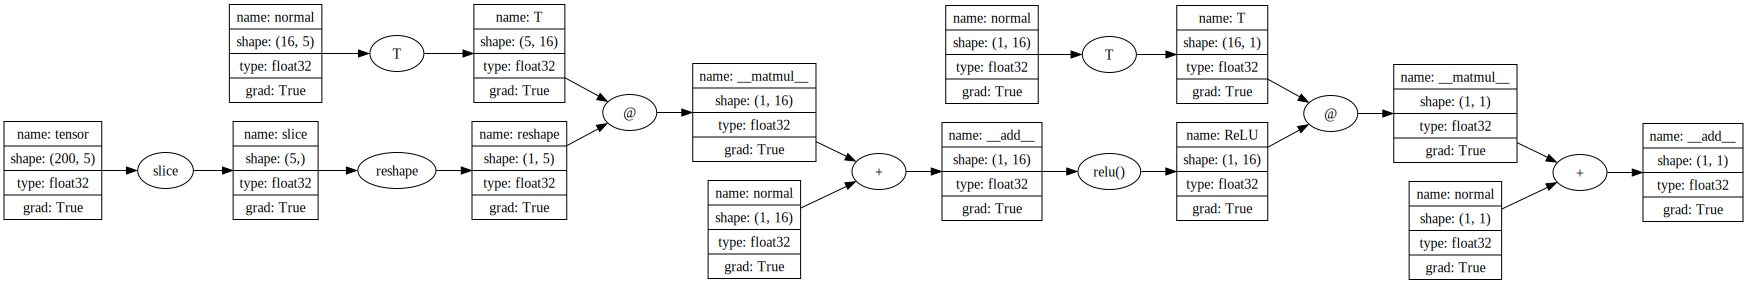

In [6]:
draw_dot(res)

In [10]:
res.backward()

In [19]:
epochs = 100
for epoch in range(epochs):
    y_pred = []
    losses = []
    s = time.monotonic()
    for i in range(X_train.shape[0]):
        output = net(X_train[i].reshape((1,5)))
        y_pred.append(output.data)
        target = y_train[i].reshape((1,1))
        loss = (output-target)**2
        losses.append(loss.data)
        loss.backward()
        for p in [net.l1.weight, net.l1.bias, net.l2.weight, net.l2.bias]:
            p.data += -3e-4*p.grad
        for p in [net.l1.weight, net.l1.bias, net.l2.weight, net.l2.bias]:
            p.grad = np.zeros_like(p.grad)
    e = time.monotonic()
    t = e - s
    #loss_epoch = sum(losses)/ len(losses)
    #r2 = r2_score(y_train, y_pred)
    if epoch % 10 == 0 or epoch == epochs-1:
        print(f"epoch: {epoch}, time: {t:.2f} sec.")
        

epoch: 0, time: 0.08 sec.
epoch: 10, time: 0.05 sec.
epoch: 20, time: 0.05 sec.
epoch: 30, time: 0.05 sec.
epoch: 40, time: 0.05 sec.
epoch: 50, time: 0.05 sec.
epoch: 60, time: 0.05 sec.
epoch: 70, time: 0.05 sec.
epoch: 80, time: 0.05 sec.
epoch: 90, time: 0.05 sec.
epoch: 99, time: 0.05 sec.
